# 3.6 Lab: Linear Regression 

## 3.6.1 Downloading Data

In [1]:
# Reading in the Boston Data Set & establishing plotting standards 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
plt.style.use('seaborn-white')


In [2]:
boston = pd.read_csv('/Users/anthonybernardi/Desktop/Werk/ISLR/Boston.csv', header=0)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 3.6.2 Simple Linear Regression

Attempting to predict median house value using 13 predictors (p=13) including average # of rooms, average house age, and others.

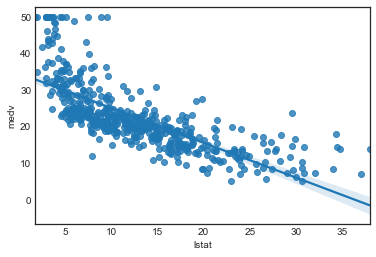

In [3]:
# Attempting a simple linear regression using lstat (percent of households with low SES) to predict median value

ax = sns.regplot(x = "lstat", y = "medv", data = boston)

In [4]:
# Using the sklearn linear regression to get coefficients, parameters, etc
# Need to reshape the data before using the sklearn model 

import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

X = boston.iloc[:,12].values
y = boston.iloc[:,13].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

print(reg.score(X, y))

print(reg.coef_)

print(reg.intercept_)

0.5441462975864799
[[-0.95004935]]
[34.55384088]


In [5]:
# Have the basic metrics of the regression model, now would be good 
# to get things like confidence internal and use the prediction intervals
# Might have to use statsmodels for this 
# Picking up confidence and prediction intervals tomorrow 

# Getting the confidence intervals from scipy 

from scipy import stats 

coef = reg.coef_

In [6]:
# For pure confidence and prediction intervals later, going to try
# stats models 

import statsmodels.api as sm
import statsmodels.formula.api as smf

lm_model = sm.OLS(y, X).fit()

predictions = lm_model.predict(X)

In [7]:
# Printing out model details 

print(lm_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                    2.71e-67
Time:                        15:49:03   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

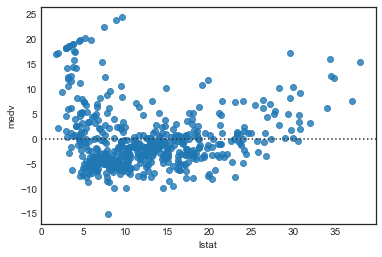

In [8]:
# residual plot 

resid = sns.residplot(x = "lstat", y = "medv", data = boston)

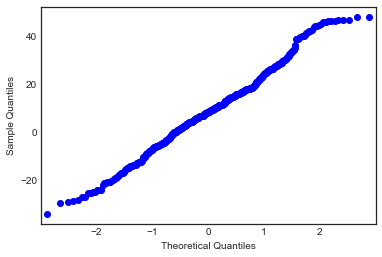

In [9]:
# Getting and storing residuals for further diagnostic plotting
## qq plot, essentially checking for normality 

resid = lm_model.resid

fig = sm.qqplot(resid)

plt.show()

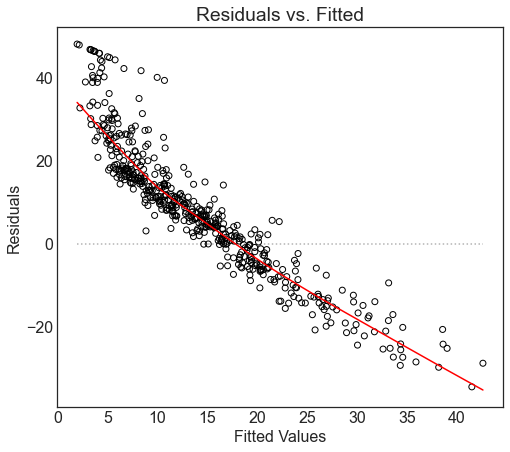

In [10]:
# Doing some more smoothing and plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

fitted = lm_model.fittedvalues

smoothed = lowess(resid, fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, resid, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

plt.show()

### 3.6.3 Multiple Linear Regression

In [11]:
# Using the same with multiple regression and multiple predictors now 
# Defining the formula we're going to use ahead of time
# medv~lstat + age , data = Boston
# Easier than creating other vectors specifically for the fitting 

mlr = sm.OLS.from_formula(formula = 'medv ~ lstat + age', data= boston)

mlr_model = mlr.fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.98e-88
Time:                        15:49:08   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [12]:
# Trying this with all predictors as in the book 

mlr_2 = sm.OLS.from_formula(formula = 'medv~ lstat + age + dis + rad + tax', data = boston)

mlr_model_2 = mlr_2.fit()

print(mlr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.24e-94
Time:                        15:49:08   Log-Likelihood:                -1614.7
No. Observations:                 506   AIC:                             3241.
Df Residuals:                     500   BIC:                             3267.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2045      1.888     23.414      0.0

In [13]:
# seems like from this model we have a multicollinearity problem when using multiple variables 
# not a huge surprise 
# Finding a way to add and calculate VIF using stats models 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(boston)

pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])],
             index=X.columns)

# Dataframe needs the prescence of a constant to calculate VIF, can do this with imported
# functions and then a for loop 
# All VIF factors look small to moderate here 


const      645.977937
crim         1.831537
zn           2.352186
indus        3.992503
chas         1.095223
nox          4.586920
rm           2.260374
age          3.100843
dis          4.396007
rad          7.808198
tax          9.205542
ptratio      1.993016
black        1.381463
lstat        3.581585
medv         3.855684
dtype: float64

### 3.6.4 Interaction Terms

In [14]:
# Doing similar work as above, just adding interaction factors with the current data set 

mlr_x = sm.OLS.from_formula(formula = 'medv~ lstat*age', data = boston)

mlr_m_x = mlr_x.fit()

print(mlr_m_x.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           4.86e-88
Time:                        15:49:09   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Non-linear Transformations of the Predictors

In [19]:
# Using the code above to accommodate non-linear transformations to the model as needed
# likely coming from the diagnostic/residual plots 
# There's a workaround here with creating a new variable and then appending to the dataframe
# but that's annoying
# Not sure how to go about this 

"""mlr_square = sm.OLS.from_formula(formula = 'medv~ lstat*lstat', data = boston)

mlr_square_x = mlr_square.fit()

print(mlr_square_x.summary())"""

# Need to find an anova() comparison equivalent as well 
# ANOVA gives us enough to reject the null hypothesis that the two models are equal, that which 
# squares lstat and one that doesn't 

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           5.08e-88
Time:                        16:02:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### 3.6.6 Qualitative Predictors

In [24]:
# Using the carseats data set and using categorical and/or qualitative variables with our model 
# Reading in the carseats data 

carseats = pd.read_csv('/Users/anthonybernardi/Desktop/Werk/ISLR/ISLR-python-master/Notebooks/Data/Carseats.csv', header=0, index_col=0)

carseats.head(5)

carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [25]:
# Using the OLS formula with qualitative variables 
# Using this allows OLS and stats models to create a dummy variable and give us the varying 
# coefficients 

lm_c = sm.OLS.from_formula(formula = 'Sales~ Income + Advertising + Population + C(ShelveLoc)', data = carseats)

lm_c_x = lm_c.fit()

print(lm_c_x.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     52.50
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.12e-41
Time:                        16:49:50   Log-Likelihood:                -880.24
No. Observations:                 400   AIC:                             1772.
Df Residuals:                     394   BIC:                             1796.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [31]:
# Gut check 

carseats.groupby(['ShelveLoc']).count()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
ShelveLoc,,,,,,,,,,
Bad,96,96,96,96,96,96,96,96,96,96
Good,85,85,85,85,85,85,85,85,85,85
Medium,219,219,219,219,219,219,219,219,219,219


### 3.6.7 Writing Functions

In [3]:
# Writing a simple function to load libraries in R, might be able to translate this 
# Having the function write 2 read_csv statements and then print a message notifying the user
# that the relevant data sets have been loaded 

def LoadLibraries():
    import pandas as pd
    boston_test = pd.read_csv('/Users/anthonybernardi/Desktop/Werk/ISLR/Boston.csv', header=0)
    carseats_test = pd.read_csv('/Users/anthonybernardi/Desktop/Werk/ISLR/ISLR-python-master/Notebooks/Data/Carseats.csv', header=0, index_col=0)
    print("The csvs have been loaded")
    


In [7]:
LoadLibraries()

The csvs have been loaded
